In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.metrics import homogeneity_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from keras.datasets import mnist
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Цель вычислительного эксперимента

Необходимо решить задачу кластеризации/классификации

## Описание выборки
База MNIST содержит 60000 образцов рукописных цифр для обучения и 10000 для тестирования.

База состоит из 4 файлов: непосредственно изображений и меток, содержащих цифры соответствующие изображениям для обучающей и для тестовой выборки. В базе содержатся изображения рукописных цифр в градациях серого, размером 20х20 пикселей вписанные в квадрат 28х28, центрованные с помощью поиска центра масс. 

## Загрузка и предобработка выборки

In [2]:
# Загрузка
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
# Преобразуем в матрицы
x_test = x_test.reshape((len(x_test),-1))
x_train = x_train.reshape((len(x_train),-1))

## Анализ выборки

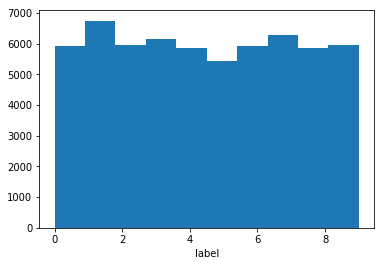

In [4]:
# Распределение чисел в обучающей выборке
plt.hist(y_train)
plt.xlabel("label")
plt.show()

In [5]:
# Проверим наличие пропусков в данных
np.isnan(x_train).any()

False

/home/enchanting_wizard_of_rhythm/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3183: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/enchanting_wizard_of_rhythm/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3184: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


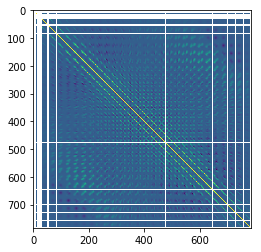

In [6]:
# Построим график корреляций признаков
data = np.corrcoef(x_train, rowvar = False)
plt.imshow(data)
plt.show()

## Список моделей
PCA + K-means

## Критерии качества
Однородность кластеров 

Accuracy (за ответ классификатора принимается наиболее представимый в кластере класс)

## Разбиение выборки на обучение и контроль
Оставим уже существующее разбиение выборки

## Критерии качества на разбиении со стандартным отклонением

### Однородность кластеров

Number of components in PCA: 3 ,homogeneity score: 0.351298218063542
Number of components in PCA: 5 ,homogeneity score: 0.42217748307579944
Number of components in PCA: 7 ,homogeneity score: 0.45305905379747646
Number of components in PCA: 12 ,homogeneity score: 0.4675572046863736
Number of components in PCA: 25 ,homogeneity score: 0.48913856822562307
Number of components in PCA: 30 ,homogeneity score: 0.4911744131976232
Number of components in PCA: 100 ,homogeneity score: 0.49290871678378856
Number of components in PCA: 200 ,homogeneity score: 0.4926483641897334
Number of components in PCA: 300 ,homogeneity score: 0.4925520899771382
Number of components in PCA: 500 ,homogeneity score: 0.5050763235331043


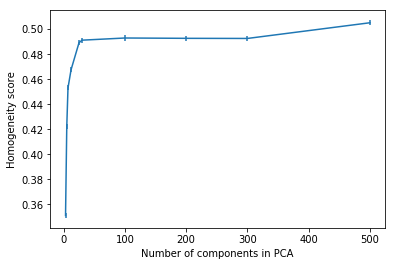

In [7]:
scores = []
pca_comps = [3, 5, 7, 12, 25, 30, 100, 200, 300, 500] # Количества компонент в PCA
for n in pca_comps:
    pca = PCA(n_components = n)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test) 
    kmeans = KMeans(n_clusters = 10, random_state = 0).fit(x_train_pca) # Кластеризуем
    y_predict = kmeans.predict(x_test_pca)
    h_score = homogeneity_score(y_test, y_predict) # Вычисляем однородность
    print('Number of components in PCA:', n, ',homogeneity score:', h_score)
    scores.append([n, h_score])

scores = np.array(scores)

plt.errorbar(scores[:, 0], scores[:, 1], np.var(scores[:, 1]))
plt.xlabel("Number of components in PCA")
plt.ylabel("Homogeneity score")
plt.show()

### Accuracy

Построим линейный классификатор, используя логистическую регрессию

Number of components in PCA: 3 ,accuracy score: 0.4565
Number of components in PCA: 5 ,accuracy score: 0.6525
Number of components in PCA: 7 ,accuracy score: 0.7383
Number of components in PCA: 12 ,accuracy score: 0.8062
Number of components in PCA: 25 ,accuracy score: 0.8815
Number of components in PCA: 30 ,accuracy score: 0.887
Number of components in PCA: 100 ,accuracy score: 0.9137


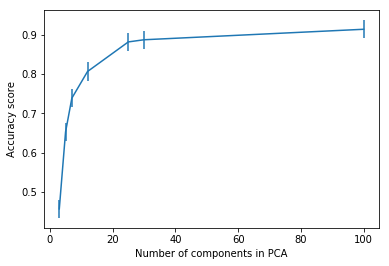

In [8]:
scores = []
pca_comps = [3, 5, 7, 12, 25, 30, 100] # Количества компонент в PCA
for n in pca_comps:
    pca = PCA(n_components = n)
    x_train_pca = pca.fit_transform(x_train)
    x_test_pca = pca.transform(x_test) 
    lr = LogisticRegression()
    lr.fit(x_train_pca, y_train) 
    y_predict = lr.predict(x_test_pca)
    acc_score = accuracy_score(y_test, y_predict) # Вычисляем точность
    print('Number of components in PCA:', n, ',accuracy score:', acc_score)
    scores.append([n, acc_score])

scores = np.array(scores)

plt.errorbar(scores[:, 0], scores[:, 1], np.var(scores[:, 1]))
plt.xlabel("Number of components in PCA")
plt.ylabel("Accuracy score")
plt.show()

Видно что использование более чем 30 компонент в PCA не даёт большого выйгрыша в точности